# This regression script models houses that were sold for under $1,000,000.

In [1]:
# Import libraries for data manipulation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np# This regression script models houses that were sold for over $1,000,000.
import seaborn as sns
%matplotlib inline

# Import libraries for regression modeling
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [2]:
# Import data from csv file
original_data = pd.read_csv('../source_data/housing_data_cleaned.csv')

df = original_data.select_dtypes(exclude=object)
df.dtypes

id                       int64
census_tract             int64
depth                  float64
exempt_building          int64
exempt_land              int64
exterior_condition       int64
fireplaces               int64
frontage               float64
garage_spaces            int64
geographic_ward          int64
interior_condition     float64
market_value             int64
market_value_date      float64
number_of_bathrooms      int64
number_of_bedrooms       int64
number_of_rooms          int64
number_stories           int64
quality_grade          float64
sale_price               int64
taxable_building         int64
taxable_land             int64
total_area             float64
total_livable_area       int64
year_built               int64
zip_code                 int64
dtype: object

In [3]:
# Analyze houses that are under $1,000,000
df = df.loc[df['sale_price'] < 1000000, :]

In [4]:
data = df.copy()

In [5]:
# Select categorical data values and reshape to arrays
# sig_columns = ['market_value','number_of_rooms','total_livable_area']
X = data.drop(['sale_price', 'depth','frontage','interior_condition','market_value_date','quality_grade','total_area'], axis=1)
# X = data[sig_columns]
y = data['sale_price'].values.reshape(-1, 1)

print(X.shape)
print(y.shape)

(67367, 18)
(67367, 1)


In [6]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Raw Data Model 

In [7]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [9]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {round(training_score, 3)}")
print(f"Testing Score: {round(testing_score, 3)}")

Training Score: 0.78
Testing Score: 0.766


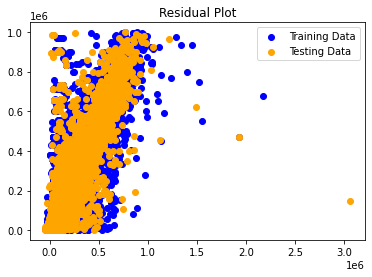

In [10]:
# Plot trained data and test data
plt.scatter(model.predict(X_train), y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), y_test, c="orange", label="Testing Data")
plt.legend()
plt.title("Residual Plot")
plt.show()

## Standard Scaler Model 

In [11]:
# Create a StandardScaler model and fit it to the training data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [12]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [13]:
# Create a LinearRegression model and fit it to the scaled training data
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [14]:
model.coef_

array([[-1.37223892e-01, -3.95606406e-02, -4.19055303e+11,
        -7.52439452e+09, -7.49830730e-02,  1.63517823e-02,
         1.66750791e-02, -5.35688112e-03,  6.70423778e+11,
         1.94446066e-02, -1.79397416e-02, -2.94863210e-02,
         8.46448612e-03, -4.00055304e+11, -1.79018077e+11,
         5.99794520e-02, -2.13112708e-04, -1.61738691e-03]])

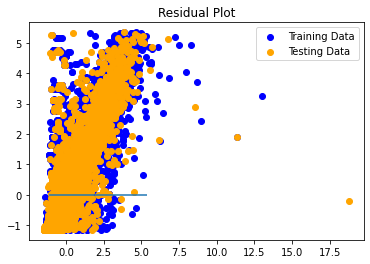

In [15]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [16]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
from sklearn.metrics import mean_squared_error

MSE_LR = mean_squared_error(y_test_scaled, predictions)
r2_LR = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {round(MSE_LR,3)}, R2: {round(r2_LR,3)}")

MSE: 0.235, R2: 0.766


## LASSO Model

In [17]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01).fit(X_train_scaled, y_train_scaled)
predictions = lasso.predict(X_test_scaled)

MSE_lasso = mean_squared_error(y_test_scaled, predictions)
r2_lasso = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {round(MSE_lasso,3)}, R2: {round(r2_lasso,3)}")

MSE: 0.237, R2: 0.763


## Ridge Model

In [18]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE_ridge = mean_squared_error(y_test_scaled, predictions)
r2_ridge = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {round(MSE_ridge,3)}, R2: {round(r2_ridge,3)}")

MSE: 0.235, R2: 0.766


## ElasticNet Model

In [19]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE_EL = mean_squared_error(y_test_scaled, predictions)
r2_EL = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {round(MSE_EL,3)}, R2: {round(r2_EL,3)}")

MSE: 0.234, R2: 0.766


### Model Scores 

In [20]:
# Display scores of all models tested
r2_results = [r2_LR, r2_lasso, r2_ridge, r2_EL]
MSE_results = [MSE_LR, MSE_lasso, MSE_ridge, MSE_EL]
r2_indices = ['Linear Regression','LASSO','Ridge','ElasticNet']

results = pd.DataFrame({"R2 Score": r2_results,
                        "MSE Score": MSE_results}, 
                       index=[r2_indices])

results

,R2 Score,MSE Score
Linear Regression,0.765699,0.234660
LASSO,0.763379,0.236984
Ridge,0.765749,0.234610
ElasticNet,0.766089,0.234269


In [21]:
# Look at variables with the most impact on the models
correlated_variables = X.columns
pd.DataFrame({'Magnitude': model.coef_[0]}, index=[correlated_variables]).sort_values('Magnitude',ascending=False)

,Magnitude
market_value,6.704238e+11
total_livable_area,5.997945e-02
number_of_bathrooms,1.944461e-02
garage_spaces,1.667508e-02
fireplaces,1.635178e-02
number_stories,8.464486e-03
year_built,-2.131127e-04
zip_code,-1.617387e-03
geographic_ward,-5.356881e-03
number_of_bedrooms,-1.793974e-02
